# Non-linear data exercise

🎯 The aim of this notebook is to explore the data set and try to fit a non-linear model. The dataset contains two targets.

In [1]:
# Importing lybraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate, \
    train_test_split, learning_curve, RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading data
data = pd.read_csv("component_screen_data.csv")
print(data.shape)
data.head()

(1000, 10)


,component_1 (μL),component_2 (μL),component_3 (μL),component_4 (μL),component_5 (μL),component_6 (μL),component_7 (μL),component_8 (μL),doubling_time (hours),cell_death_percentage (%)
0,9.13,7.47,5.80,7.75,7.66,6.69,1.65,9.11,25.79,0.8746
1,0.09,3.95,8.95,6.91,1.86,6.09,3.75,8.59,27.38,0.9045
2,9.00,0.25,5.50,6.91,1.85,7.61,3.43,0.62,24.96,0.4511
3,1.21,7.95,4.56,5.05,9.04,1.67,8.88,6.87,22.47,0.8099
4,1.57,1.80,8.00,3.38,6.10,8.34,6.98,0.85,23.21,0.8231


## Cleaning

In [3]:
# Get basic details from data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   component_1 (μL)           1000 non-null   float64
 1   component_2 (μL)           1000 non-null   float64
 2   component_3 (μL)           1000 non-null   float64
 3   component_4 (μL)           1000 non-null   float64
 4   component_5 (μL)           1000 non-null   float64
 5   component_6 (μL)           1000 non-null   float64
 6   component_7 (μL)           1000 non-null   float64
 7   component_8 (μL)           1000 non-null   float64
 8   doubling_time (hours)      1000 non-null   float64
 9   cell_death_percentage (%)  1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


✅ Data set has no missing values

In [4]:
# Checking for duplicates
data.duplicated().sum()

0

✅ Data set has no duplicates

In [5]:
# Gives more details of the numeric columns
data.describe()

,component_1 (μL),component_2 (μL),component_3 (μL),component_4 (μL),component_5 (μL),component_6 (μL),component_7 (μL),component_8 (μL),doubling_time (hours),cell_death_percentage (%)
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.873220,5.045170,5.14028,5.078100,4.93337,4.970010,5.088230,4.99030,22.021940,0.734731
std,2.927468,2.889509,2.88244,2.925823,2.85827,2.902112,2.937122,2.92156,5.026368,0.224461
min,0.000000,0.000000,0.01000,0.020000,0.00000,0.000000,0.010000,0.05000,11.350000,0.000300
25%,2.420000,2.547500,2.74000,2.422500,2.43500,2.507500,2.560000,2.36750,18.840000,0.676950
50%,4.680000,4.950000,5.12500,5.165000,4.86500,4.950000,4.995000,4.92500,21.935000,0.831050
75%,7.402500,7.642500,7.66000,7.640000,7.27250,7.550000,7.772500,7.59000,25.250000,0.881100
max,9.990000,9.980000,9.97000,9.980000,9.99000,10.000000,9.990000,9.98000,120.000000,1.000000


✅ Maximum and minimum volumes of each compoment are inside the required range of 0-10μL.

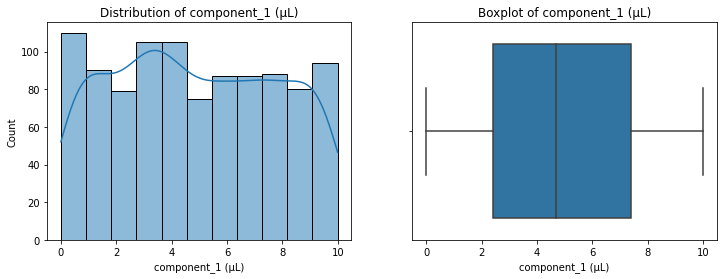

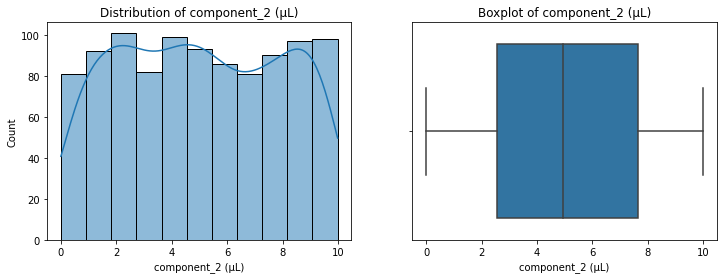

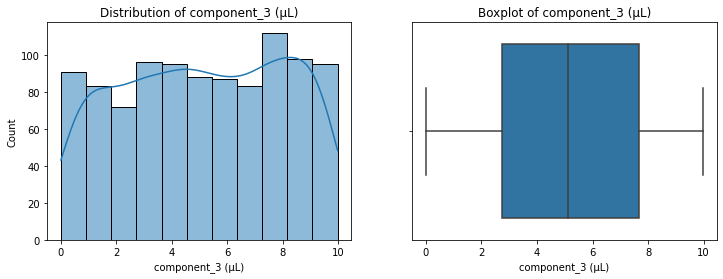

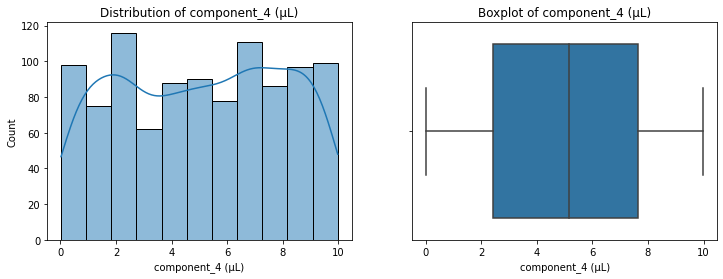

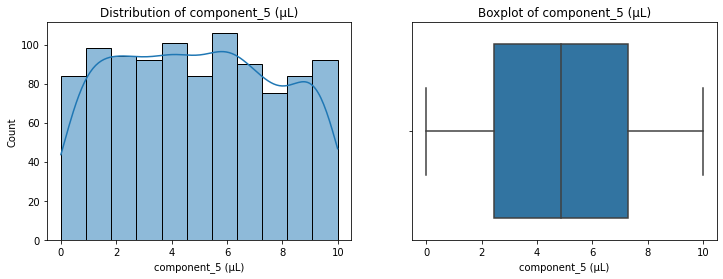

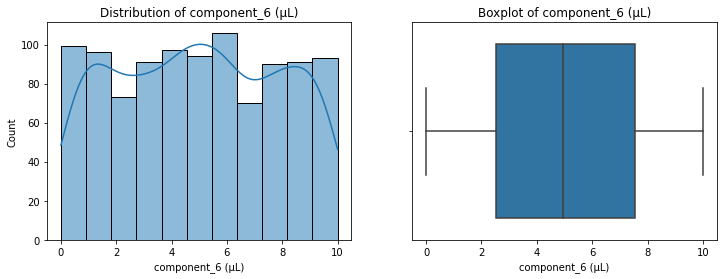

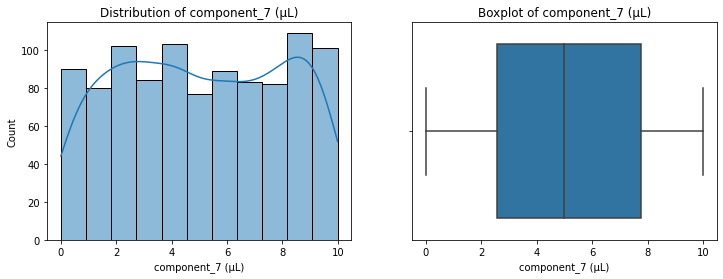

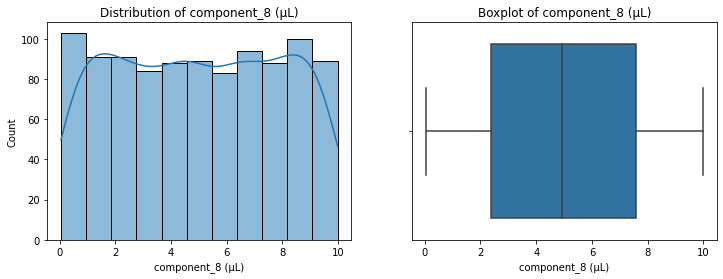

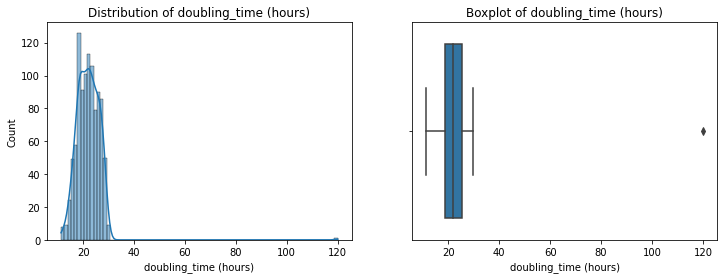

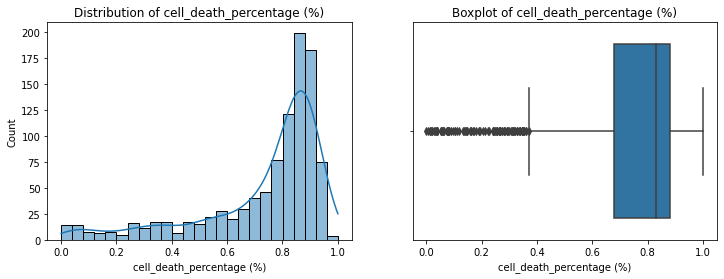

In [6]:
# Checking for distribution and outliers

for c in data.columns:
    
    fig, ax = plt.subplots(1,2, figsize = (12,4))
    
    ax[0].set_title(f"Distribution of {c}")
    sns.histplot(x = data[c], kde = True, ax = ax[0])
    
    ax[1].set_title(f"Boxplot of {c}")
    sns.boxplot(x = data[c], ax = ax[1])


In [7]:
data.columns

Index(['component_1 (μL)', 'component_2 (μL)', 'component_3 (μL)',
       'component_4 (μL)', 'component_5 (μL)', 'component_6 (μL)',
       'component_7 (μL)', 'component_8 (μL)', 'doubling_time (hours)',
       'cell_death_percentage (%)'],
      dtype='object')

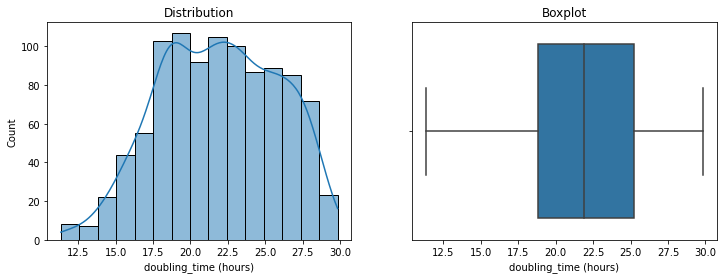

In [8]:
# Dropping sample with 120 double time hours

# Get index corresponding to maximum value
high_double_time = data['doubling_time (hours)'].argmax() 

# Drop row
data_clean = data.drop(high_double_time).reset_index(drop=True) 

# Visualize histogram and boxplot
fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].set_title(f"Distribution")
sns.histplot(x = data_clean['doubling_time (hours)'], kde = True, ax = ax[0]); 

ax[1].set_title(f"Boxplot")
sns.boxplot(x = data_clean['doubling_time (hours)'], ax = ax[1]);    


❌ Removed row 13 from analysis, which was an outlier, and was taking 5 days for the cells to duplicate.

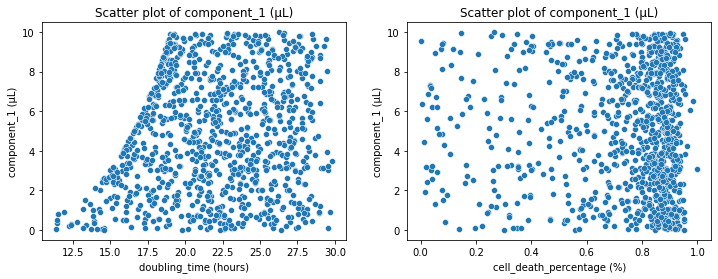

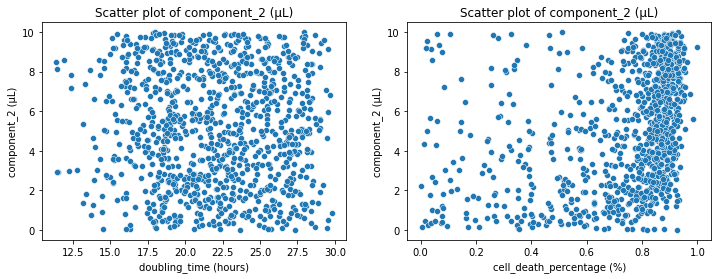

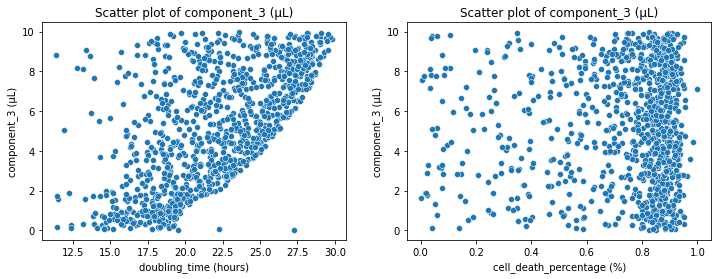

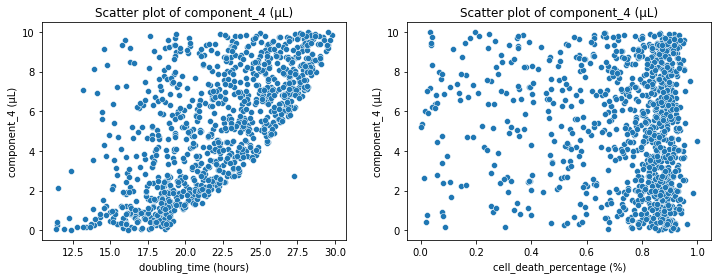

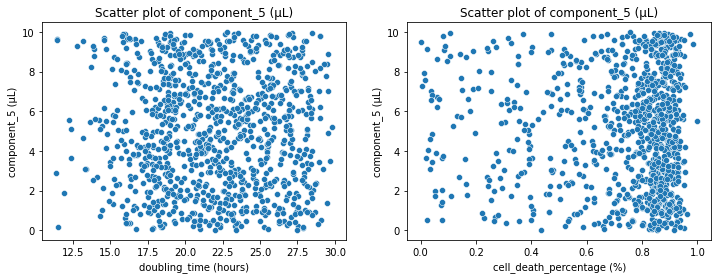

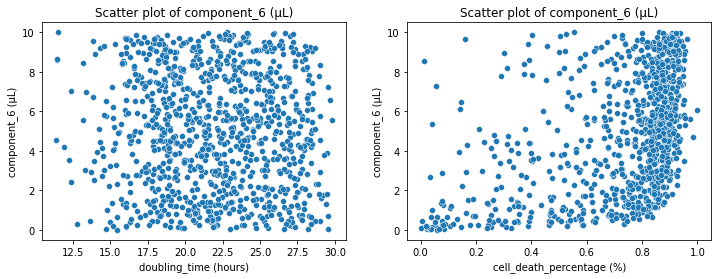

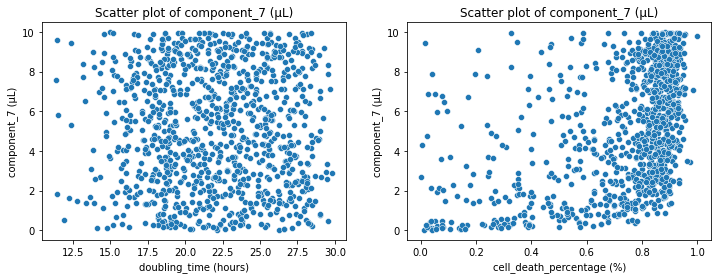

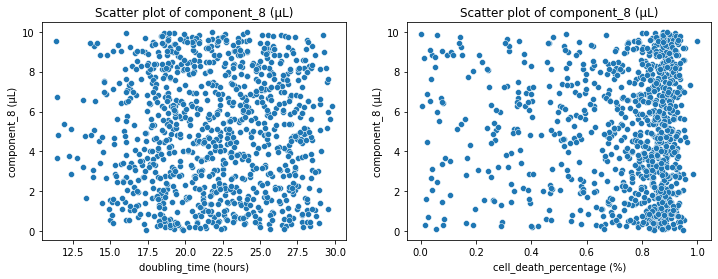

In [9]:
# Checking for linearity between components and Doubling times and Cell death percentage

components = data_clean.iloc[:,0:8]
for f in components.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    
    ax[0].set_title(f"Scatter plot of {f}")
    sns.scatterplot(data=data_clean, x=data_clean["doubling_time (hours)"], y=data_clean[f], ax=ax[0])
                    
    ax[1].set_title(f"Scatter plot of {f}")
    sns.scatterplot(data=data_clean, x=data_clean["cell_death_percentage (%)"], y=data_clean[f], ax=ax[1])

✏️ There is no linearity between components and targets.

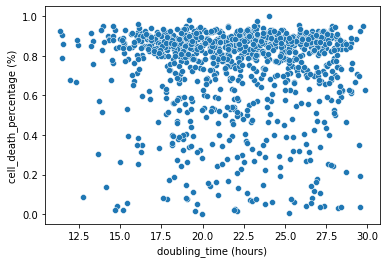

In [10]:
# Checking for linearity betwwen targets:
sns.scatterplot(data=data_clean, x=data_clean["doubling_time (hours)"], y=data_clean["cell_death_percentage (%)"]);

## Scaling

In [11]:
# Components don't have a normal distribution

# Scale with MinMaxScaler
minmax_scaler = MinMaxScaler()
components_s = minmax_scaler.fit_transform(components)

# Transform scaled data back into a dataframe
components_s = pd.DataFrame(components_s, columns=components.columns)
components_s.head()

,component_1 (μL),component_2 (μL),component_3 (μL),component_4 (μL),component_5 (μL),component_6 (μL),component_7 (μL),component_8 (μL)
0,0.913914,0.748497,0.581325,0.776104,0.766533,0.669,0.164329,0.912387
1,0.009009,0.395792,0.897590,0.691767,0.185371,0.609,0.374749,0.860020
2,0.900901,0.025050,0.551205,0.691767,0.184369,0.761,0.342685,0.057402
3,0.121121,0.796593,0.456827,0.505020,0.904810,0.167,0.888778,0.686808
4,0.157157,0.180361,0.802209,0.337349,0.610220,0.834,0.698397,0.080564


In [12]:
# Doubling time don't have outliers
doubling = data_clean[["doubling_time (hours)"]]

# Scale with StandarScaler
std_scaler = StandardScaler()
doubling_s = std_scaler.fit_transform(doubling)

# Transform scaled data back into a dataframe
doubling_s = pd.DataFrame(doubling_s, columns=doubling.columns)
doubling_s.head()


,doubling_time (hours)
0,0.977424
1,1.379403
2,0.767586
3,0.138072
4,0.325157


In [13]:
# Cell death percentage has outliers
death = data_clean[["cell_death_percentage (%)"]]

# Scale with RobustScaler
rob_scaler = RobustScaler()
death_s = rob_scaler.fit_transform(death)

# Transform scaled data back into a dataframe
death_s = pd.DataFrame(death_s, columns=death.columns)
death_s.head()


,cell_death_percentage (%)
0,0.213026
1,0.359452
2,-1.860921
3,-0.103820
4,-0.039177


In [14]:
# Combining scaled dataset
data_scaled = pd.concat([components_s, doubling_s, death_s], axis = 1)
pd.DataFrame(data_scaled)

,component_1 (μL),component_2 (μL),component_3 (μL),component_4 (μL),component_5 (μL),component_6 (μL),component_7 (μL),component_8 (μL),doubling_time (hours),cell_death_percentage (%)
0,0.913914,0.748497,0.581325,0.776104,0.766533,0.669,0.164329,0.912387,0.977424,0.213026
1,0.009009,0.395792,0.897590,0.691767,0.185371,0.609,0.374749,0.860020,1.379403,0.359452
2,0.900901,0.025050,0.551205,0.691767,0.184369,0.761,0.342685,0.057402,0.767586,-1.860921
3,0.121121,0.796593,0.456827,0.505020,0.904810,0.167,0.888778,0.686808,0.138072,-0.103820
4,0.157157,0.180361,0.802209,0.337349,0.610220,0.834,0.698397,0.080564,0.325157,-0.039177
...,...,...,...,...,...,...,...,...,...,...
994,0.336336,0.433868,0.694779,0.851406,0.414830,0.677,0.306613,0.213494,1.313671,0.189520
995,0.314314,0.168337,0.803213,0.105422,0.368737,0.850,0.448898,0.165156,-0.825160,-0.116063
996,0.938939,0.073146,0.329317,0.791165,0.053106,0.286,0.010020,0.647533,0.327685,-3.689030
997,0.008008,0.043086,0.365462,0.664659,0.287575,0.280,0.573146,0.339376,0.191164,-2.300686


## Insights

A correlation matrix can give us a better idea of the interactions between components *vs* cell growth and cell death.

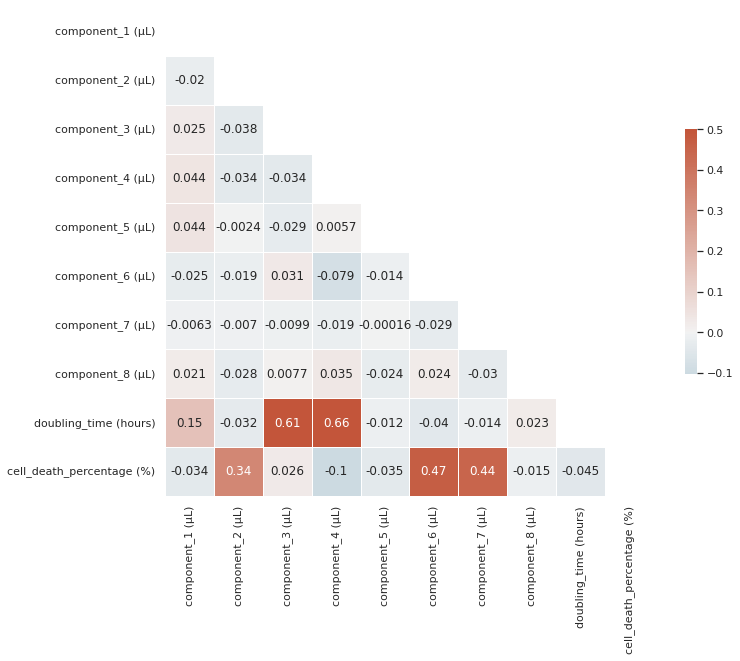

In [15]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data_scaled.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

🕑 Higher concentrations of components 4 and 3 are correlated with longer hours to duplicate the number of cells.

⚰️ Higher concentrations of components 6, 7 and 2 are correlated with higher cell death percentages.

## Modeling

In [16]:
# Defining the features
X = data_scaled.drop(columns=['doubling_time (hours)', 'cell_death_percentage (%)'])
X.head()

,component_1 (μL),component_2 (μL),component_3 (μL),component_4 (μL),component_5 (μL),component_6 (μL),component_7 (μL),component_8 (μL)
0,0.913914,0.748497,0.581325,0.776104,0.766533,0.669,0.164329,0.912387
1,0.009009,0.395792,0.897590,0.691767,0.185371,0.609,0.374749,0.860020
2,0.900901,0.025050,0.551205,0.691767,0.184369,0.761,0.342685,0.057402
3,0.121121,0.796593,0.456827,0.505020,0.904810,0.167,0.888778,0.686808
4,0.157157,0.180361,0.802209,0.337349,0.610220,0.834,0.698397,0.080564


In [17]:
# Defining the targets
y=data_scaled.iloc[:,-2:]
y

,doubling_time (hours),cell_death_percentage (%)
0,0.977424,0.213026
1,1.379403,0.359452
2,0.767586,-1.860921
3,0.138072,-0.103820
4,0.325157,-0.039177
...,...,...
994,1.313671,0.189520
995,-0.825160,-0.116063
996,0.327685,-3.689030
997,0.191164,-2.300686


In [18]:
# Spliting into Train and Test
X_train, X_test, y_t_train, y_t_test, y_d_train, y_d_test = train_test_split(X,
                                                    y.iloc[:,-2], y.iloc[:,-1],
                                                    test_size = 0.3,
                                                    random_state = 82,
                                                    shuffle = True,
                                                    )

In [19]:
X_train.shape, X_test.shape, y_t_train.shape, y_t_test.shape, y_d_train.shape, y_d_test.shape

((699, 8), (300, 8), (699,), (300,), (699,), (300,))

### Support Vector Regression

In [20]:
#Instanciate model
SVR_time = SVR(C=1.0, epsilon=0.1)

In [21]:
# Defining model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluating the model
scores = cross_validate(SVR_time, X_train, y_t_train,
                        cv=cv, # set number of repeated k-folds (here 30 - 10 splits and 3 repeats)
                        n_jobs=-1) # parallelize execution using all processors (makes faster)

In [22]:
# Train model
SVR_time.fit(X_train, y_t_train)

SVR()

In [23]:
# Score model on test set
SVR_time.score(X_train, y_t_train)

0.9617216012285118

In [24]:
# Fine tunning the model SVR_time

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 10]}
clf_time = GridSearchCV(SVR_time, parameters)
clf_time.fit(X_test, y_t_test)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [25]:
# Best score
print(clf_time.best_score_)

# Best Params
print(clf_time.best_params_)

# Best estimator
print(clf_time.best_estimator_)

0.8890422293101334
{'C': 10, 'kernel': 'rbf'}
SVR(C=10)


In [26]:
SVR_time_best = SVR(C=10, epsilon=0.1, kernel='rbf')

In [27]:
# Train model
SVR_time_best.fit(X_train, y_t_train)

SVR(C=10)

In [28]:
SVR_time_best.score(X_test, y_t_test)

0.9425066212159322

📝 94.2% of the variance in the doubling times can be explained by the combined variations in different components.

In [29]:
#Instanciate model for death target
SVR_death = SVR(C=1.0, epsilon=0.1)

In [30]:
# Defining model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluating the model
scores = cross_validate(SVR_death, X_train, y_d_train,
                        cv=cv, # set number of repeated k-folds (here 30 - 10 splits and 3 repeats)
                        n_jobs=-1) # parallelize execution using all processors (makes faster)

In [31]:
# Train model
SVR_death.fit(X_train, y_d_train)

SVR()

In [32]:
# Score model on test set
SVR_death.score(X_test, y_d_test)

0.6730355137001474

In [33]:
# Fine tunning the model for SVR_death

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 20]}
clf_death = GridSearchCV(SVR_death, parameters)
clf_death.fit(X_test, y_d_test)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 20],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [34]:
# Best score
print(clf_death.best_score_)

# Best Params
print(clf_death.best_params_)

# Best estimator
print(clf_death.best_estimator_)

0.6100420460730842
{'C': 20, 'kernel': 'rbf'}
SVR(C=20)


In [35]:
SVR_death_best = SVR(C=20, epsilon=0.1, kernel='rbf')

In [36]:
SVR_death_best.fit(X_train, y_d_train)

SVR(C=20)

In [37]:
# Score model on test set
SVR_death_best.score(X_test, y_d_test)

0.7028853215529505

📝 70.2% of the variance in the death percentage can be explained by the combined variations in different components.

### Regression based on k-nearest neighbors

In [38]:
from sklearn.neighbors import KNeighborsRegressor
neigh_time = KNeighborsRegressor()

In [39]:
# Defining model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluating the model
scores = cross_validate(neigh_time, X_train, y_t_train,
                        cv=cv, # set number of repeated k-folds (here 30 - 10 splits and 3 repeats)
                        n_jobs=-1) # parallelize execution using all processors (makes faster)

In [40]:
neigh_time.fit(X_train, y_t_train)

KNeighborsRegressor()

In [41]:
neigh_time.score(X_train, y_t_train)

0.8755237296014339

In [42]:
# Fine tunning the model for neigh_time

parameters = {'n_neighbors':[1,10]}
clf_n_time = GridSearchCV(neigh_time, parameters)
clf_n_time.fit(X_test, y_t_test)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 10]})

In [43]:
# Best score
print(clf_n_time.best_score_)

# Best Params
print(clf_n_time.best_params_)

# Best estimator
print(clf_n_time.best_estimator_)

0.7033562703749957
{'n_neighbors': 10}
KNeighborsRegressor(n_neighbors=10)


In [44]:
neigh_time_b = KNeighborsRegressor(n_neighbors=10)

In [45]:
# Defining model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluating the model
scores = cross_validate(neigh_time_b, X_train, y_t_train,
                        cv=cv, # set number of repeated k-folds (here 30 - 10 splits and 3 repeats)
                        n_jobs=-1) # parallelize execution using all processors (makes faster)

In [46]:
neigh_time_b.fit(X_train, y_t_train)

KNeighborsRegressor(n_neighbors=10)

In [47]:
neigh_time_b.score(X_test, y_t_test)

0.807382272127128

📝 80.7% of the variance in the doubling times can be explained by the combined variations in different components.

📝 SVR, with a score of  94.2%, works better for time.

In [48]:
neigh_death = KNeighborsRegressor()

In [49]:
# Defining model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluating the model
scores = cross_validate(neigh_death, X_train, y_d_train,
                        cv=cv, 
                        n_jobs=-1) 

In [50]:
neigh_death.fit(X_train, y_d_train)

KNeighborsRegressor()

In [51]:
neigh_death.score(X_train, y_d_train)

0.6832164272945356

In [52]:
# Fine tunning the model for neigh_time

parameters = {'n_neighbors':[1,10]}
clf_n_death = GridSearchCV(neigh_death, parameters)
clf_n_death.fit(X_test, y_d_test)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 10]})

In [53]:
# Best score
print(clf_n_death.best_score_)

# Best Params
print(clf_n_death.best_params_)

# Best estimator
print(clf_n_death.best_estimator_)

0.41531474432251986
{'n_neighbors': 10}
KNeighborsRegressor(n_neighbors=10)


In [54]:
neigh_death_b = KNeighborsRegressor(n_neighbors=10)
neigh_death_b.fit(X_train, y_d_train)

KNeighborsRegressor(n_neighbors=10)

In [55]:
neigh_death_b.score(X_test, y_d_test)

0.5035395765363344

📝 50.3% of the variance in the death percentage can be explained by the combined variations in different components.

📝 SVR, with a score of 70.2%, works better for death

## Predicting

Prediction will be done using SVR models.

In [56]:
y_predict = SVR_time_best.predict(X_test)
y_predict = pd.DataFrame(y_predict, columns=["doubling_time (hours)"], index=X_test.index)
y_predict

,doubling_time (hours)
969,1.355687
771,1.785967
943,-0.437470
477,-0.037166
347,0.328607
...,...
679,-1.188898
549,1.616648
223,-0.058107
364,-0.330620


In [57]:
y_death=SVR_death_best.predict(X_test)
y_death= pd.DataFrame(y_death, columns=["cell_death_percentage (%)"], index=X_test.index)
y_death

,cell_death_percentage (%)
969,-0.348729
771,0.298836
943,-0.109365
477,-1.001461
347,0.681414
...,...
679,-0.829980
549,-1.452514
223,0.314708
364,-1.489924


In [58]:
y_predict=y_predict.join(y_death)
y_predict

,doubling_time (hours),cell_death_percentage (%)
969,1.355687,-0.348729
771,1.785967,0.298836
943,-0.437470,-0.109365
477,-0.037166,-1.001461
347,0.328607,0.681414
...,...,...
679,-1.188898,-0.829980
549,1.616648,-1.452514
223,-0.058107,0.314708
364,-0.330620,-1.489924


✏️ As the dataset was scaled, results need to have the transformation reversed, so a better understanding of the prediction can be performed.

In [59]:
# Reversing y_predict to original values
y_predict_r = y_predict
y_predict_r[["cell_death_percentage (%)"]] = rob_scaler.inverse_transform(y_predict_r[["cell_death_percentage (%)"]])
y_predict_r[["doubling_time (hours)"]] = std_scaler.inverse_transform(y_predict_r[["doubling_time (hours)"]])
y_predict_r = y_predict_r.round({'doubling_time (hours)': 2#, 'cell_death_percentage (%)': 4
                                  })
y_predict_r

,doubling_time (hours),cell_death_percentage (%)
969,27.29,0.759890
771,28.99,0.892122
943,20.19,0.808768
477,21.78,0.626602
347,23.22,0.970245
...,...,...
679,17.22,0.661618
549,28.32,0.534497
223,21.69,0.895363
364,20.62,0.526857


In [60]:
# Doubling times prediction
doubling_preds = data_clean[["doubling_time (hours)"]].join(y_predict_r[["doubling_time (hours)"]], how='right', 
                                                            lsuffix='_Actual', rsuffix='_Predicted')
doubling_preds

,doubling_time (hours)_Actual,doubling_time (hours)_Predicted
969,27.37,27.29
771,29.57,28.99
943,19.85,20.19
477,22.11,21.78
347,22.03,23.22
...,...,...
679,16.71,17.22
549,29.22,28.32
223,21.69,21.69
364,20.72,20.62


In [61]:
# Cell death prediction
death_preds = data_clean[["cell_death_percentage (%)"]].join(y_predict_r[["cell_death_percentage (%)"]], how='right', 
                                                            lsuffix='_Actual', rsuffix='_Predicted')

death_preds

,cell_death_percentage (%)_Actual,cell_death_percentage (%)_Predicted
969,0.8144,0.759890
771,0.9249,0.892122
943,0.8470,0.808768
477,0.4965,0.626602
347,0.9146,0.970245
...,...,...
679,0.9041,0.661618
549,0.6693,0.534497
223,0.8453,0.895363
364,0.5931,0.526857
